
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: November 9, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Kaiwen Zhang -- kz4493
2. Matthew Ruffner -- mar9632

# Question 1 (20 pts) - Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).


In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(226067, 161)

In [2]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,1,0,0,0,0,0,1,0,1,0
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,1,0,0,0,0,0,1,0,1,0
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,1,0,0,0,0,0,1,0,1,0
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,1,0,0,0,0,0,1,0,1,0
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,20000,20000,20000.0,22.35,767.44,55000.0,1,20.49,8.0,0.0,...,0,0,0,0,0,0,1,0,1,0
226063,10000,10000,10000.0,6.67,307.27,52000.0,1,24.65,27.0,0.0,...,1,0,0,0,0,0,1,0,1,0
226064,13000,13000,13000.0,7.21,402.66,90000.0,1,4.08,15.0,0.0,...,1,0,0,0,0,0,1,0,1,0
226065,10000,10000,10000.0,18.94,366.26,33280.0,1,31.61,13.0,0.0,...,1,0,0,0,0,0,1,0,1,0


Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1 (1 pt)** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2 (8 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plot the [scree plot]
(https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3 (5 pts)** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4 (4 pts)** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5 (2 pts)** What do you observe from the ROC curves? 

# ANSWER

### 1.1

In [3]:
df = df.fillna(0)
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [4]:
X_scaled_train_df = pd.DataFrame(X_scaled_train)
X_scaled_test_df = pd.DataFrame(X_scaled_test)

### 1.2

In [5]:
from sklearn.decomposition import PCA

pca_100 = PCA(n_components=100)
principalComponents_100 = pca_100.fit_transform(X_scaled_train)
principalComponents_100_test = pca_100.fit_transform(X_scaled_test)
print('100 components:', 100* pca_100.explained_variance_ratio_)

pca_30 = PCA(n_components=30)
principalComponents_30 = pca_30.fit_transform(X_scaled_train)
principalComponents_30_test = pca_30.fit_transform(X_scaled_test)
print('30 components:', 100 * pca_30.explained_variance_ratio_)

pca_10 = PCA(n_components=10)
principalComponents_10 = pca_10.fit_transform(X_scaled_train)
principalComponents_10_test = pca_10.fit_transform(X_scaled_test)
print('10 components:', 100 * pca_10.explained_variance_ratio_)

pc_100_df = pd.DataFrame(principalComponents_100)
pc_30_df = pd.DataFrame(principalComponents_30)
pc_10_df = pd.DataFrame(principalComponents_10)
pc_100_df_test = pd.DataFrame(principalComponents_100_test)
pc_30_df_test = pd.DataFrame(principalComponents_30_test)
pc_10_df_test = pd.DataFrame(principalComponents_10_test)

100 components: [9.19852974 7.06662645 5.99759447 5.46079153 4.94166502 4.50417606
 3.83455355 3.37146098 3.17591649 2.88143671 2.79697185 2.30587312
 2.21320222 1.82985506 1.56025663 1.50031239 1.27202937 1.23966273
 1.19698302 1.16268295 1.14875341 1.08674239 1.04304239 1.02820011
 0.97775676 0.96967049 0.94100056 0.9328885  0.91094699 0.84519908
 0.82553427 0.80617189 0.78641237 0.78005548 0.74179856 0.71199787
 0.70559413 0.69584879 0.67433078 0.66957671 0.58960932 0.5466006
 0.54096545 0.50194904 0.49464536 0.49109442 0.47692411 0.45268219
 0.44440046 0.39707271 0.39059803 0.38441104 0.37897565 0.37647077
 0.36915903 0.35970342 0.34729955 0.33352184 0.31842341 0.31415763
 0.29358532 0.27894865 0.26203021 0.25110264 0.24800068 0.24155484
 0.23552644 0.23227503 0.21543186 0.20563543 0.19421939 0.18669965
 0.17137258 0.16433766 0.15738263 0.14906762 0.14723678 0.14632197
 0.13735544 0.13503613 0.12879968 0.12045611 0.11770016 0.11573511
 0.11109453 0.11044256 0.10572367 0.10284993 0.

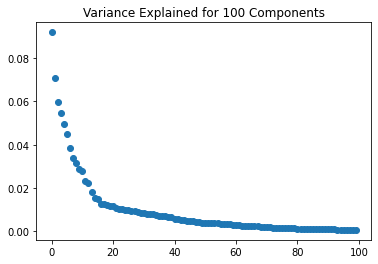

total variance explained:  0.9923968047511762


In [6]:
# import matplotlib as plt
plt.figure()
plt.scatter(range(100), pca_100.explained_variance_ratio_[:100])
plt.title('Variance Explained for 100 Components')
plt.show()
print('total variance explained: ', np.sum(pca_100.explained_variance_ratio_[:100]))

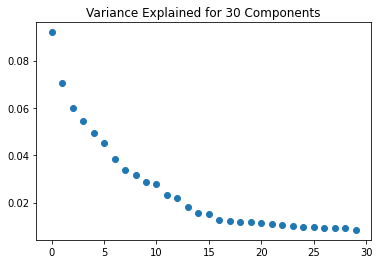

total variance explained:  0.773947810232366


In [7]:
plt.figure()
plt.scatter(range(30), pca_100.explained_variance_ratio_[:30])
plt.title('Variance Explained for 30 Components')
plt.show()
print('total variance explained: ', np.sum(pca_100.explained_variance_ratio_[:30]))

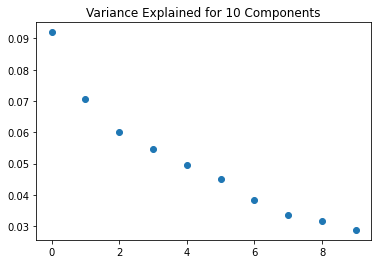

total variance explained:  0.5043275099097689


In [8]:
plt.figure()
plt.scatter(range(10), pca_100.explained_variance_ratio_[:10])
plt.title('Variance Explained for 10 Components')
plt.show()
print('total variance explained: ', np.sum(pca_100.explained_variance_ratio_[:10]))

### 1.3

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# We assume that the training process will occur for X_train
target_names = ['Class 1', 'Class 2']

In [10]:
logreg1 = LogisticRegression(random_state=4,max_iter=10000)
logreg_X_scaled_train = logreg1.fit(X_scaled_train_df, y_train)
print('Full dimensions:', classification_report(y_train, logreg_X_scaled_train.predict(X_scaled_train_df), target_names=target_names))

Full dimensions:               precision    recall  f1-score   support

     Class 1       0.80      0.49      0.60      2488
     Class 2       0.99      1.00      1.00    167062

    accuracy                           0.99    169550
   macro avg       0.90      0.74      0.80    169550
weighted avg       0.99      0.99      0.99    169550



In [11]:
logreg2 = LogisticRegression(random_state=4,max_iter=10000)
logreg_X_scaled_train_pca_100 = logreg2.fit(pc_100_df, y_train)
print('100 dimensions:', classification_report(y_train, logreg_X_scaled_train_pca_100.predict(pc_100_df), target_names=target_names))

100 dimensions:               precision    recall  f1-score   support

     Class 1       0.74      0.22      0.34      2488
     Class 2       0.99      1.00      0.99    167062

    accuracy                           0.99    169550
   macro avg       0.86      0.61      0.67    169550
weighted avg       0.98      0.99      0.98    169550



In [12]:
logreg3 = LogisticRegression(random_state=4,max_iter=10000)
logreg_X_scaled_train_pca_30 = logreg3.fit(pc_30_df, y_train)
print('30 dimensions:', classification_report(y_train, logreg_X_scaled_train_pca_30.predict(pc_30_df), target_names=target_names))

30 dimensions:               precision    recall  f1-score   support

     Class 1       0.30      0.04      0.07      2488
     Class 2       0.99      1.00      0.99    167062

    accuracy                           0.98    169550
   macro avg       0.64      0.52      0.53    169550
weighted avg       0.98      0.98      0.98    169550



In [13]:
logreg4 = LogisticRegression(random_state=4,max_iter=10000)
logreg_X_scaled_train_pca_10 = logreg4.fit(pc_10_df, y_train)
print('10 dimensions:', classification_report(y_train, logreg_X_scaled_train_pca_10.predict(pc_10_df), target_names=target_names))

10 dimensions:               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00      2488
     Class 2       0.99      1.00      0.99    167062

    accuracy                           0.99    169550
   macro avg       0.49      0.50      0.50    169550
weighted avg       0.97      0.99      0.98    169550



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.4

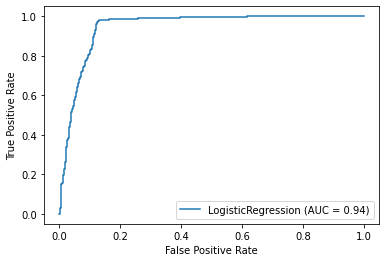

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

logreg5 = LogisticRegression(random_state=4,max_iter=10000)
logreg_X_scaled_train = logreg5.fit(X_scaled_train_df, y_train)

logreg_disp = plot_roc_curve(logreg_X_scaled_train, X_scaled_test_df, y_test)
plt.show()

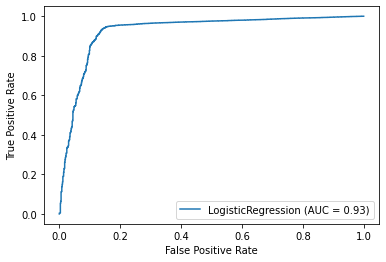

In [15]:
logreg6 = LogisticRegression(random_state=4,max_iter=10000)

logreg_X_scaled_train_pca_100 = logreg6.fit(pc_100_df, y_train)
logreg_disp2 = plot_roc_curve(logreg_X_scaled_train_pca_100, pc_100_df_test, y_test)
plt.show()

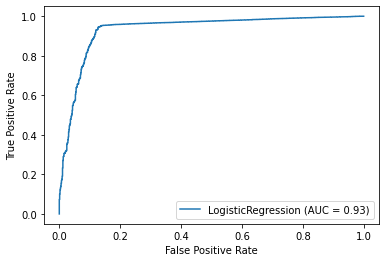

In [16]:
logreg7 = LogisticRegression(random_state=4,max_iter=10000)

logreg_X_scaled_train_pca_30 = logreg7.fit(pc_30_df, y_train)
logreg_disp3 = plot_roc_curve(logreg_X_scaled_train_pca_30, pc_30_df_test, y_test)
plt.show()

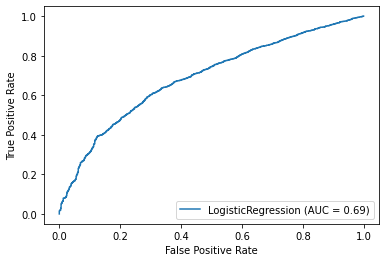

In [17]:
logreg8 = LogisticRegression(random_state=4,max_iter=10000)

logreg_X_scaled_train_pca_10 = logreg8.fit(pc_10_df, y_train)
logreg_disp4 = plot_roc_curve(logreg_X_scaled_train_pca_10, pc_10_df_test, y_test)
plt.show()

### 1.5


Looking at the resulting ROC curves, it seems like that somewhere between 10 and 30 components we drop off too much on explained variance and lose classification separation power of our logistic regression. Prior to this threshold, we actually perform just as accurate on our principal components training sets as the overall dataset. This indicates we can sacrifice a decent amount of complexity and retain a vast amount of the class separation ability of our model.

# Question 2 (20 pts)- Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [19]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [20]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [21]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [22]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


# Answer 2
## (a)

In [23]:
proportion_yes = len(bank_data[bank_data['deposit_cat'] == 1]) / len(bank_data)
proportion_no = len(bank_data[bank_data['deposit_cat'] == 0]) / len(bank_data)

In [24]:
bank_data['deposit_cat'].value_counts()

0    5873
1    5289
Name: deposit_cat, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# depth 2
decisiontree2g = DecisionTreeClassifier(random_state=50, max_depth = 2, criterion='gini').fit(X_train,Y_train)
train_pred_2g = decisiontree2g.predict(X_train)
test_pred_2g = decisiontree2g.predict(X_test)
print('Training MSE depth 2, criterion: gini', mean_squared_error(Y_train, train_pred_2g))
print('Test MSE depth 2, criterion: gini', mean_squared_error(Y_test, test_pred_2g))
decisiontree2e = DecisionTreeClassifier(random_state=50, max_depth = 2, criterion='entropy').fit(X_train,Y_train)
train_pred_2e = decisiontree2e.predict(X_train)
test_pred_2e = decisiontree2e.predict(X_test)
print('Training MSE depth 2, criterion: entropy', mean_squared_error(Y_train, train_pred_2e))
print('Test MSE depth 2, criterion: entropy', mean_squared_error(Y_test, test_pred_2e))

# depth 5
decisiontree5g = DecisionTreeClassifier(random_state=50, max_depth = 5, criterion='gini').fit(X_train,Y_train)
train_pred_5g = decisiontree5g.predict(X_train)
test_pred_5g = decisiontree5g.predict(X_test)
print('Training MSE depth 5, criterion: gini', mean_squared_error(Y_train, train_pred_5g))
print('Test MSE depth 5, criterion: gini', mean_squared_error(Y_test, test_pred_5g))
decisiontree5e = DecisionTreeClassifier(random_state=50, max_depth = 5, criterion='entropy').fit(X_train,Y_train)
train_pred_5e = decisiontree5e.predict(X_train)
test_pred_5e = decisiontree5e.predict(X_test)
print('Training MSE depth 5, criterion: entropy', mean_squared_error(Y_train, train_pred_5e))
print('Test MSE depth 5, criterion: entropy', mean_squared_error(Y_test, test_pred_5e))

# depth 10
decisiontree10g = DecisionTreeClassifier(random_state=50, max_depth = 10, criterion='gini').fit(X_train,Y_train)
train_pred_10g = decisiontree10g.predict(X_train)
test_pred_10g = decisiontree10g.predict(X_test)
print('Training MSE depth 10, criterion: gini', mean_squared_error(Y_train, train_pred_10g))
print('Test MSE depth 10, criterion: gini', mean_squared_error(Y_test, test_pred_10g))
decisiontree10e = DecisionTreeClassifier(random_state=50, max_depth = 10, criterion='entropy').fit(X_train,Y_train)
train_pred_10e = decisiontree10e.predict(X_train)
test_pred_10e = decisiontree10e.predict(X_test)
print('Training MSE depth 10, criterion: entropy', mean_squared_error(Y_train, train_pred_10e))
print('Test MSE depth 10, criterion: entropy', mean_squared_error(Y_test, test_pred_10e))

# depth 20
decisiontree20g = DecisionTreeClassifier(random_state=50, max_depth = 20, criterion='gini').fit(X_train,Y_train)
train_pred_20g = decisiontree20g.predict(X_train)
test_pred_20g = decisiontree20g.predict(X_test)
print('Training MSE depth 20, criterion: gini', mean_squared_error(Y_train, train_pred_20g))
print('Test MSE depth 20, criterion: gini', mean_squared_error(Y_test, test_pred_20g))
decisiontree20e = DecisionTreeClassifier(random_state=50, max_depth = 20, criterion='entropy').fit(X_train,Y_train)
train_pred_20e = decisiontree20e.predict(X_train)
test_pred_20e = decisiontree20e.predict(X_test)
print('Training MSE depth 20, criterion: entropy', mean_squared_error(Y_train, train_pred_20e))
print('Test MSE depth 20, criterion: entropy', mean_squared_error(Y_test, test_pred_20e))

Training MSE depth 2, criterion: gini 0.27147496920147834
Test MSE depth 2, criterion: gini 0.27317510076130763
Training MSE depth 2, criterion: entropy 0.2880501735916676
Test MSE depth 2, criterion: entropy 0.29108822212270485
Training MSE depth 5, criterion: gini 0.20237428603427035
Test MSE depth 5, criterion: gini 0.2239140170174653
Training MSE depth 5, criterion: entropy 0.20013439354910964
Test MSE depth 5, criterion: entropy 0.22167487684729065
Training MSE depth 10, criterion: gini 0.13663344159480345
Test MSE depth 10, criterion: gini 0.2109270040304523
Training MSE depth 10, criterion: entropy 0.14984880725725166
Test MSE depth 10, criterion: entropy 0.20824003582624273
Training MSE depth 20, criterion: gini 0.015791242020383022
Test MSE depth 20, criterion: gini 0.2561576354679803
Training MSE depth 20, criterion: entropy 0.03494232276850711
Test MSE depth 20, criterion: entropy 0.26153157187639947


## (b)



While the training accuracy can only increase as we allow the max increase, at some point allowing the tree depth to go beyond a certain point will start overfitting on the training data resulting in a decreased performance on the test set. In our case, the test error starts to increase after we allow the tree depth to go beyond 10.

# (c)

In [26]:
column_names = X_train.columns

dt2 = decisiontree2g

# isolating the most important features to our model
importances = pd.DataFrame(decisiontree2g.feature_importances_).set_index(column_names)
importances[0][importances[0] != 0].sort_values(ascending=False)

duration            0.849306
poutcome_success    0.150694
Name: 0, dtype: float64

In [27]:
decisiontree2g.feature_importances_

array([0.        , 0.        , 0.84930612, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15069388,
       0.        , 0.        ])

[Text(167.4, 181.2, 'X[2] <= 206.5\ngini = 0.499\nsamples = 8929\nvalue = [4700, 4229]'),
 Text(83.7, 108.72, 'X[29] <= 0.5\ngini = 0.327\nsamples = 3612\nvalue = [2867, 745]'),
 Text(41.85, 36.23999999999998, 'gini = 0.273\nsamples = 3380\nvalue = [2828, 552]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.28\nsamples = 232\nvalue = [39, 193]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 441.5\ngini = 0.452\nsamples = 5317\nvalue = [1833, 3484]'),
 Text(209.25, 36.23999999999998, 'gini = 0.5\nsamples = 2762\nvalue = [1340, 1422]'),
 Text(292.95, 36.23999999999998, 'gini = 0.311\nsamples = 2555\nvalue = [493, 2062]')]

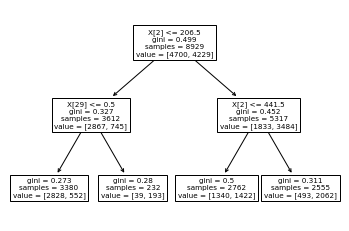

In [28]:
tree.plot_tree(dt2)

The most important features for our decision tree of depth 2 using the Gini criterion are the **duration** variable with a relative importance of 84.9% and the **poutcome_success** variable with a relative importance of 15.1%. 

## (d)

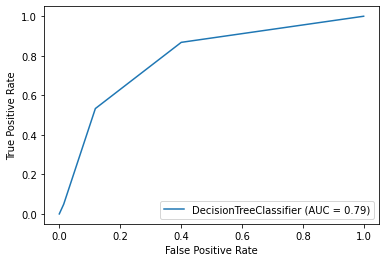

In [29]:
logreg_disp_dt = plot_roc_curve(dt2, X_test, Y_test)
plt.show()

In [30]:
#getting the AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, dt2.predict(X_test))

0.733621258183339

In [31]:
# getting accuracy

print(classification_report(Y_test, dt2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1173
           1       0.66      0.87      0.75      1060

    accuracy                           0.73      2233
   macro avg       0.75      0.73      0.72      2233
weighted avg       0.75      0.73      0.72      2233



We get a model accuracy of 73% and an AUC score of 73.3% for the test data

# Question 3 (15 pts) - Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A (5 pts)**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B (5 pts)**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C (5 pts)**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

In [32]:
vehicles = pd.read_csv('vehicle.csv')
vehicles[:10]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


# Part A

In [33]:
from sklearn import preprocessing
X = vehicles.drop('class', 1)
y = vehicles['class']
print(y)

le = preprocessing.LabelEncoder()
fitted_y = le.fit(y)
transformed_y = fitted_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, transformed_y, test_size=0.2, random_state=50)

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object


# Part B


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()), \
                 ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), \
                 ('decision tree', DecisionTreeClassifier())]).fit(X_train, y_train)

predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.92      0.89      0.91        91
           2       0.82      0.92      0.87        39

    accuracy                           0.89       170
   macro avg       0.88      0.89      0.88       170
weighted avg       0.89      0.89      0.89       170



As can be seen, we end up with a test set classification accuracy of 91%

# Part C

In [35]:
pca = PCA()

pipe_pca = Pipeline([('scaler', StandardScaler()), \
                 ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), \
                 ('pca', pca), \
                 ('clf', DecisionTreeClassifier())])
                 
param_grid = {'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}
search = GridSearchCV(pipe_pca, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print('best parameters: ',search.best_params_)

pca_res = pipe_pca.set_params(clf__max_depth = 15, pca__n_components = 8).fit(X_train, y_train)
predictions_pca = pipe_pca.predict(X_test)
print(classification_report(y_test, predictions_pca))

best parameters:  {'clf__max_depth': 15, 'pca__n_components': 10}
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.93      0.92      0.93        91
           2       0.77      0.85      0.80        39

    accuracy                           0.87       170
   macro avg       0.85      0.85      0.85       170
weighted avg       0.87      0.87      0.87       170



The best parameters from the GridSearchCV were -> 'clf__max_depth': 15, 'pca__n_components': 8

The resulting test set classification accuracy was 84%

# Question 4 (15pts) - Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

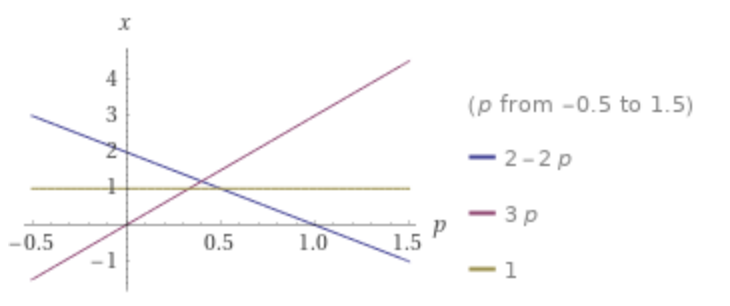

Let p = $P(C1|x)$. The three curves are the expected losses given the three different predictions/decisions. From the range of p=0 to p=1/3, we see that $C2$ is the prediction with least expected loss. From p=1/3 to p=1/2, it is reject. From p=1/2 to p=1, it is $C1$.

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (7th topic onwards, i.e. "stochastic gradient descent" onwards). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 7, write 7A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

The note that was most interesting was topic 8B. We really enjoyed the way in which it started with relaying the structure and premise of a neural network with how actual neurons work. Particularly important is the idea of the activation function, which works both on the level of our model in a binary sense and on the level of neurons firing or not firing. (We don't know whether there is a biological equivalent of "self-correcting weights", but that is very important as well.)

Beyond the high-level concepts, we also learned from this note that activation functions are "universal approximators" that map a function from D-dimensional space (D being the number of input layers) to K-dimensional space (K being the number of output layers). It was also interesting to see the group give a connection to and introductory math explanation for vectors in the role of linear transformation that occurs in linear activation functions.

However, since this idea of linear transformation is rather abstract, it would have been a good idea to go deeper into the math -- recap the linear algebra concepts -- and really demonstrate how linear activation functions work. Additionally, the connection between stochastic gradient descent and neural networks could have been better fleshed out. We know how S.G.D. works for linear regression, but how does it look when applied to our multiple-layered neural networks?